### Data Life Cycle Project
---
# Cuando la economía marca el ritmo:
# patrones de consumo musical a lo largo de los ciclos económicos
---
### Authors: Rubén García, Claudia Vello, Izaro Urrutxua, Óscar Castro, Sara Lanza, Amanda González

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

In [13]:
# Load datasets
spotify_path = "playlist_2010to2023_curado.csv"
gdp_path = "TasaCrecimientoPIBpc_curado_long.csv"

spotify_df = pd.read_csv(spotify_path)
gdp_df = pd.read_csv(gdp_path)

## Exploratory Data Analysis (EDA)

In [14]:
# Select the numeric music variables we will use
music_vars = [
    "danceability", "energy", "valence", "tempo", "loudness",
    "speechiness", "acousticness", "instrumentalness", "liveness",
    "duration_ms", "track_popularity"
]

# Aggregate Spotify by year (mean per year)
spotify_yearly = (
    spotify_df
    .groupby("year")[music_vars]
    .mean()
    .reset_index()
)

In [15]:
gdp_df.rename(columns={"Year": "year"}, inplace=True)

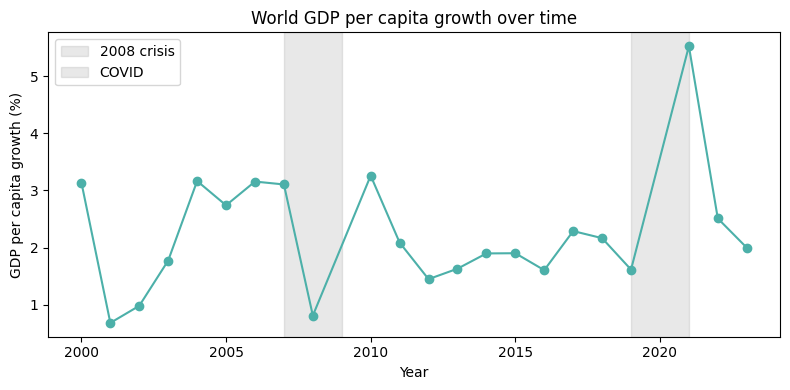

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(gdp_df["year"], gdp_df["Value"], marker='o', color="#4CB0A9")
plt.axvspan(2007, 2009, alpha=0.2, label='2008 crisis', color='#8C8C8C')
plt.axvspan(2019, 2021, alpha=0.2, label='COVID', color='#8C8C8C')
plt.xlabel("Year")
plt.ylabel("GDP per capita growth (%)")
plt.title("World GDP per capita growth over time")
plt.legend()
plt.tight_layout()
plt.savefig("eda_gdp_growth_over_time.png", dpi=200)
plt.show()

In [17]:
# plt.figure(figsize=(8, 4))
# plt.plot(gdp_df["year"], gdp_df["Value"], marker='o', color="#4CB0A9")
# plt.axvspan(2007, 2009, alpha=0.2, label='Crisis de 2008', color='#8C8C8C')
# plt.axvspan(2019, 2021, alpha=0.2, label='COVID-19', color='#8C8C8C')
# plt.xlabel("Año")
# plt.ylabel("Crecimiento del PIB per cápita (%)")
# plt.title("Crecimiento del PIB per cápita mundial a lo largo del tiempo")
# plt.legend()
# plt.tight_layout()
# plt.savefig("eda_gdp_growth_over_time.png", dpi=200)
# plt.show()

### Musical Features Used in the Analysis

The analysis focuses on a set of numerical audio features provided by Spotify, which describe different perceptual and structural aspects of music. In particular, the following variables are considered:

- **Valence**  
Valence represents the musical positiveness conveyed by a track. High valence values correspond to music that sounds more positive, cheerful, or happy, while low values are associated with music that sounds sad, melancholic, or gloomy. This feature captures the emotional tone of the music rather than the lyrical content.

- **Danceability**  
Danceability describes how suitable a track is for dancing, based on a combination of musical elements such as rhythm stability, beat strength, and tempo regularity. Higher values indicate music that is more rhythmic and easy to dance to, whereas lower values correspond to music that is less rhythmically structured.

- **Energy**  
Energy measures the intensity and activity level of a track. Tracks with high energy tend to be fast, loud, and dynamic, often characterized by strong beats and dense instrumentation. Low-energy tracks are generally calmer, softer, and more relaxed. Importantly, energy is independent of emotional valence: a track can be energetic but emotionally negative, or calm and emotionally positive.

- **Acousticness**  
Acousticness estimates the likelihood that a track is acoustic in nature. Higher values indicate a greater presence of acoustic instruments and minimal electronic production, while lower values suggest a higher degree of electronic or synthesized sounds. This feature reflects production style rather than emotional content.

Together, these variables allow the characterization of musical trends along multiple dimensions, including emotional tone, rhythmic structure, intensity, and production style.

In [18]:
features = ['valence', 'danceability', 'energy', 'acousticness']

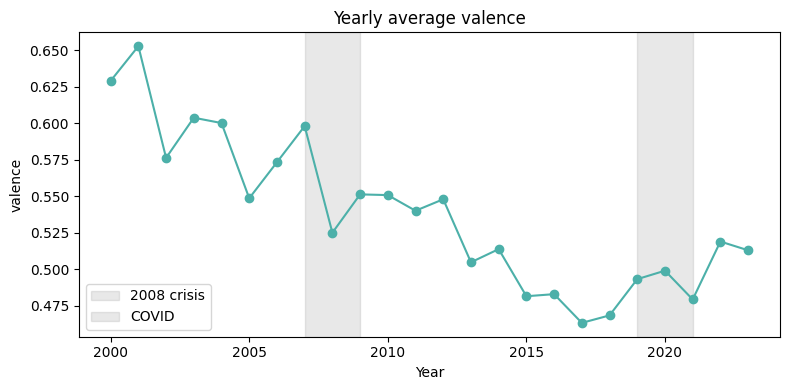

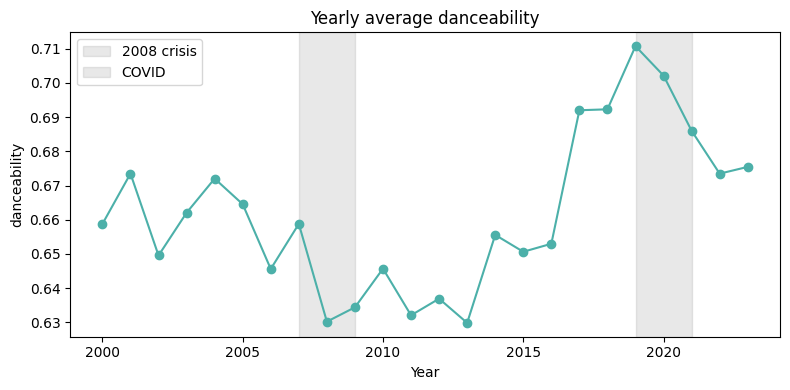

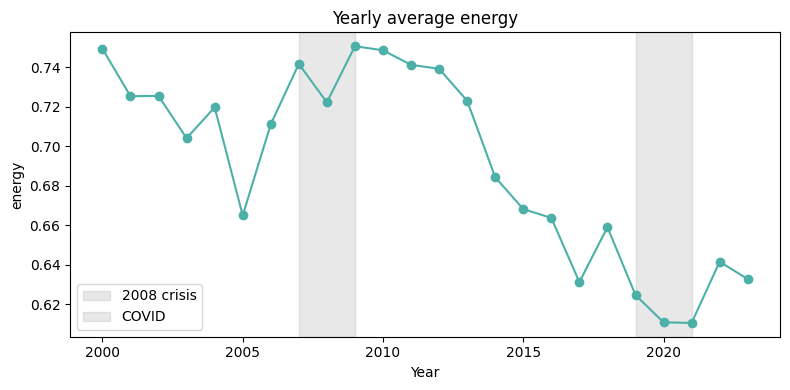

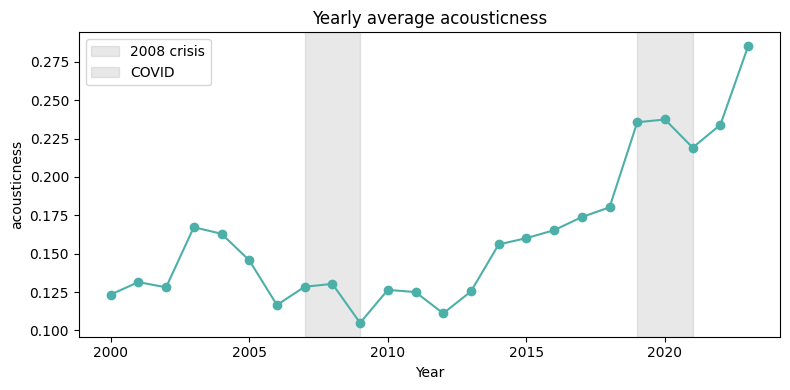

In [19]:
for f in features:
    plt.figure(figsize=(8,4))
    plt.plot(spotify_yearly["year"], spotify_yearly[f], marker='o', color="#4CB0A9")
    plt.axvspan(2007, 2009, alpha=0.2, label='2008 crisis', color='#8C8C8C')
    plt.axvspan(2019, 2021, alpha=0.2, label='COVID', color='#8C8C8C')
    plt.xlabel("Year")
    plt.ylabel(f)
    plt.title(f"Yearly average {f}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"eda_{f}_over_time.png", dpi=200)
    plt.show()

In [20]:
# for f in features:
#     plt.figure(figsize=(8,4))
#     plt.plot(spotify_yearly["year"], spotify_yearly[f], marker='o', color="#4CB0A9")
#     plt.axvspan(2007, 2009, alpha=0.2, label='Crisis de 2008', color='#8C8C8C')
#     plt.axvspan(2019, 2021, alpha=0.2, label='COVID-19', color='#8C8C8C')
#     plt.xlabel("Año")
#     plt.ylabel(f)
#     plt.title(f"Promedio anual de {f}")
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig(f"eda_{f}_over_time.png", dpi=200)
#     plt.show()

## Annual Relationship between Economic Growth and Music Characteristics

In [21]:
# Merge su year
annual_df = pd.merge(
    spotify_yearly,
    gdp_df,
    on="year",
    how="inner"
)

# Controllo rapido
print("Merged dataset shape:", annual_df.shape)
print("Years:", annual_df["year"].min(), "->", annual_df["year"].max())

# annual_df.head()

Merged dataset shape: (22, 18)
Years: 2000 -> 2023


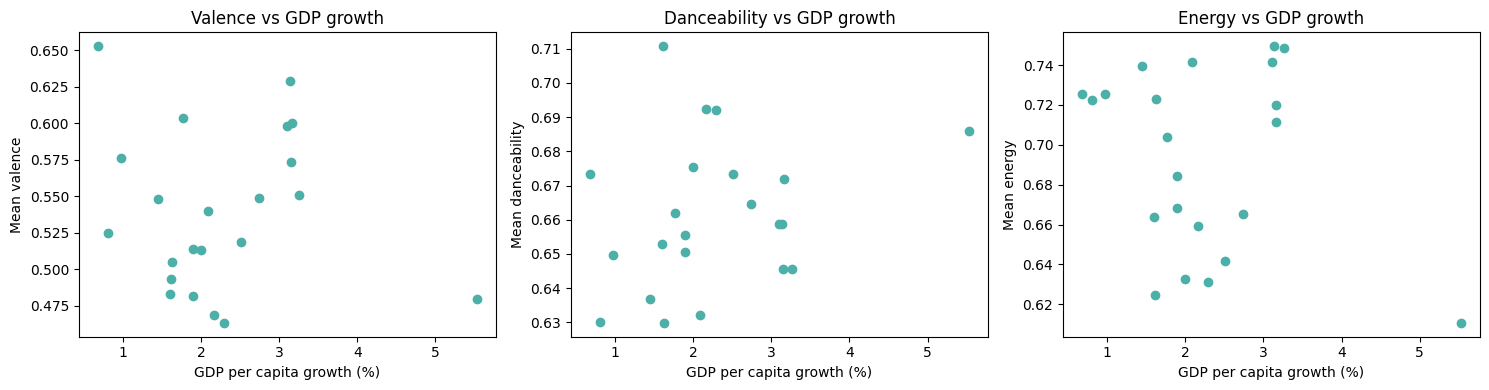

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

for ax, feature in zip(axes, features):
    ax.scatter(
        annual_df["Value"],
        annual_df[feature],
        color="#4CB0A9"
    )
    
    ax.set_xlabel("GDP per capita growth (%)")
    ax.set_ylabel(f"Mean {feature}")
    ax.set_title(f"{feature.capitalize()} vs GDP growth")

plt.tight_layout()
plt.savefig("scatter_levels_music_vs_gdp.png", dpi=200)
plt.show()

In [23]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# for ax, feature in zip(axes, features):
#     ax.scatter(
#         annual_df["Value"],
#         annual_df[feature],
#         color="#4CB0A9"
#     )
    
#     ax.set_xlabel("Crecimiento del PIB per cápita (%)")
#     ax.set_ylabel(f"Media de {feature}")
#     ax.set_title(f"{feature.capitalize()} vs crecimiento del PIB")

# plt.tight_layout()
# plt.savefig("scatter_levels_music_vs_gdp.png", dpi=200)
# plt.show()

In [24]:
results = []

for feature in music_vars:
    x = annual_df["Value"]
    y = annual_df[feature]
    
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)
    
    results.append({
        "feature": feature,
        "pearson_r": pearson_r,
        "pearson_pvalue": pearson_p,
        "spearman_r": spearman_r,
        "spearman_pvalue": spearman_p
    })

corr_df = pd.DataFrame(results)
corr_df = corr_df.set_index("feature")
corr_df

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue
feature,,,,
danceability,0.247651,0.266480,0.224167,0.315909
energy,-0.218609,0.328370,-0.045737,0.839832
valence,-0.070804,0.754200,0.026539,0.906677
tempo,0.001660,0.994151,-0.015246,0.946313
loudness,-0.229430,0.304379,-0.087521,0.698539
speechiness,0.104320,0.644075,0.195935,0.382181
acousticness,0.179388,0.424406,0.040090,0.859403
instrumentalness,-0.154676,0.491892,-0.198193,0.376609
liveness,-0.060558,0.788923,-0.007340,0.974137


- The correlations are close to zero and the p-values are high for all features.
- This means that, at a global and yearly aggregated level, we do not find evidence of a statistically significant association between GDP per capita growth and the Spotify audio features considered.
- This does not prove there is no relationship; it suggests that any effect is not detectable with this level of aggregation (annual + global) and these variables.

---

# Comparison of Music Characteristics across Economic Crises

In [25]:
def assign_period(year):
    # Financial crisis 2008
    if year in [2006, 2007]:
        return "pre_2008"
    elif year in [2008, 2009]:
        return "crisis_2008"
    elif year in [2010, 2011]:
        return "post_2008"
    
    # COVID crisis
    elif year in [2018, 2019]:
        return "pre_covid"
    elif year in [2020, 2021]:
        return "covid"
    elif year in [2022, 2023]:
        return "post_covid"
    
    # All other years
    else:
        return "other"

annual_df["period"] = annual_df["year"].apply(assign_period)

# Strucural check
annual_df.groupby("period")["year"].agg(["min", "max", "count"])

,min,max,count
period,,,
covid,2021,2021,1
crisis_2008,2008,2008,1
other,2000,2017,12
post_2008,2010,2011,2
post_covid,2022,2023,2
pre_2008,2006,2007,2
pre_covid,2018,2019,2


In [26]:
period_means = (
    annual_df
    .groupby("period")[music_vars]
    .mean()
)

period_means

,danceability,energy,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms,track_popularity
period,,,,,,,,,,,
covid,0.686011,0.610663,0.479253,120.671400,-6.499179,0.101597,0.219119,0.005045,0.162806,193264.642105,63.063158
crisis_2008,0.630160,0.722298,0.524955,125.624351,-5.658649,0.090753,0.130304,0.016539,0.187824,232168.680851,69.617021
other,0.658180,0.699981,0.550355,119.035599,-5.762765,0.095154,0.145884,0.016821,0.171404,232559.893634,70.515666
post_2008,0.638845,0.744995,0.545380,121.960686,-5.192804,0.091373,0.125681,0.016739,0.192120,227877.108247,69.762887
post_covid,0.674460,0.637235,0.515924,123.578475,-6.302418,0.091267,0.259664,0.004211,0.181144,197644.751145,71.873340
pre_2008,0.652175,0.726494,0.585629,121.062420,-5.417547,0.111296,0.122502,0.006240,0.183383,231741.475123,68.681757
pre_covid,0.701533,0.641943,0.480750,119.451426,-5.936052,0.121433,0.207950,0.003866,0.161005,202124.684923,75.590241


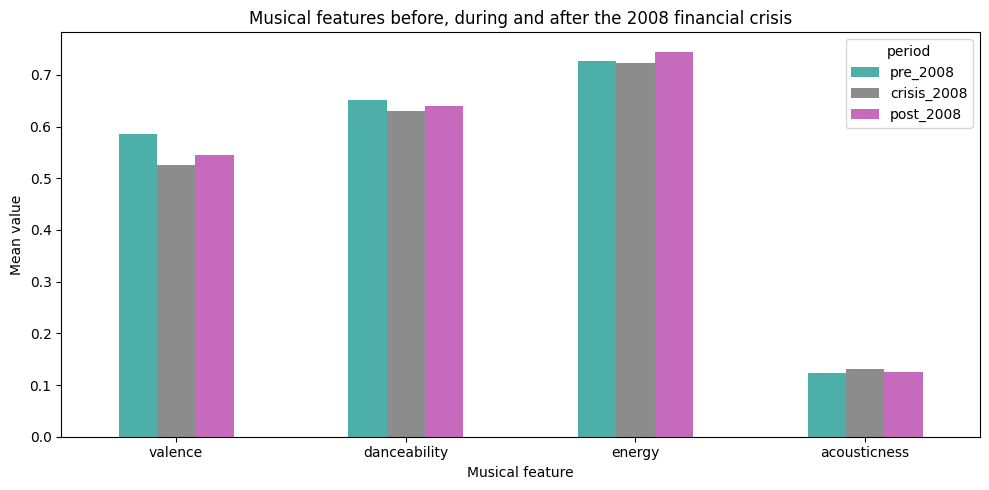

In [27]:
periods_2008 = ["pre_2008", "crisis_2008", "post_2008"]

colors = ["#4CB0A9", "#8C8C8C", "#C66ABD"]
plot_2008 = period_means.loc[periods_2008, features]

plot_2008.T.plot(
    kind="bar",
    figsize=(10, 5),
    color=colors
)

plt.xlabel("Musical feature")
plt.ylabel("Mean value")
plt.title("Musical features before, during and after the 2008 financial crisis")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("bar_periods_2008_music_features.png", dpi=200)
plt.show()

In [28]:
# periods_2008 = ["pre_2008", "crisis_2008", "post_2008"]

# colors = ["#4CB0A9", "#8C8C8C", "#C66ABD"]
# plot_2008 = period_means.loc[periods_2008, features]

# plot_2008.T.plot(
#     kind="bar",
#     figsize=(10, 5),
#     color=colors
# )

# plt.xlabel("Característica musical")
# plt.ylabel("Valor medio")
# plt.title("Características musicales antes, durante y después de la crisis financiera de 2008")
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.savefig("bar_periods_2008_music_features.png", dpi=200)
# plt.show()

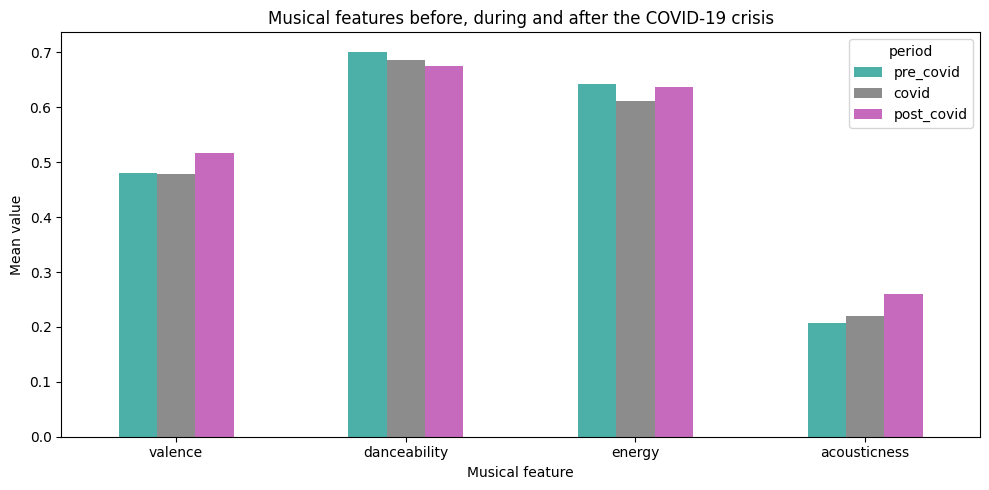

In [29]:
periods_covid = ["pre_covid", "covid", "post_covid"]

plot_covid = period_means.loc[periods_covid, features]

plot_covid.T.plot(
    kind="bar",
    figsize=(10, 5),
    color=colors
)

plt.xlabel("Musical feature")
plt.ylabel("Mean value")
plt.title("Musical features before, during and after the COVID-19 crisis")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("bar_periods_covid_music_features.png", dpi=200)
plt.show()

In [30]:
# periods_covid = ["pre_covid", "covid", "post_covid"]

# plot_covid = period_means.loc[periods_covid, features]

# plot_covid.T.plot(
#     kind="bar",
#     figsize=(10, 5),
#     color=colors
# )

# plt.xlabel("Característica musical")
# plt.ylabel("Valor medio")
# plt.title("Características musicales antes, durante y después de la crisis del COVID-19")
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.savefig("bar_periods_covid_music_features.png", dpi=200)
# plt.show()

In [31]:
def mannwhitney_pairwise(df, period_col, features, group_a, group_b):
    """Compute Mann-Whitney U tests feature-by-feature between two period labels."""
    rows = []
    for f in features:
        a = df.loc[df[period_col] == group_a, f].dropna()
        b = df.loc[df[period_col] == group_b, f].dropna()

        # If one of the groups is empty, return NaN (safety)
        if len(a) == 0 or len(b) == 0:
            rows.append({"feature": f, "comparison": f"{group_a} vs {group_b}", "U_statistic": float("nan"), "p_value": float("nan")})
            continue

        stat, p_value = mannwhitneyu(a, b, alternative="two-sided")
        rows.append({"feature": f, "comparison": f"{group_a} vs {group_b}", "U_statistic": stat, "p_value": p_value})

    return pd.DataFrame(rows)

In [32]:
# 2008 crisis: pre, crisis, post
tests_2008 = pd.concat([
    mannwhitney_pairwise(annual_df, "period", features, "pre_2008", "crisis_2008"),
    mannwhitney_pairwise(annual_df, "period", features, "crisis_2008", "post_2008"),
    mannwhitney_pairwise(annual_df, "period", features, "pre_2008", "post_2008"),
], ignore_index=True)

test_2008_all = tests_2008.pivot(index="feature", columns="comparison", values="p_value")
test_2008_all

comparison,crisis_2008 vs post_2008,pre_2008 vs crisis_2008,pre_2008 vs post_2008
feature,,,
acousticness,0.666667,0.666667,1.000000
danceability,0.666667,0.666667,0.666667
energy,0.666667,1.000000,0.666667
valence,0.666667,0.666667,0.333333


In [33]:
# COVID crisis: pre, crisis, post
tests_covid = pd.concat([
    mannwhitney_pairwise(annual_df, "period", features, "pre_covid", "covid"),
    mannwhitney_pairwise(annual_df, "period", features, "covid", "post_covid"),
    mannwhitney_pairwise(annual_df, "period", features, "pre_covid", "post_covid"),
], ignore_index=True)

test_covid_all = tests_covid.pivot(index="feature", columns="comparison", values="p_value")
test_covid_all

comparison,covid vs post_covid,pre_covid vs covid,pre_covid vs post_covid
feature,,,
acousticness,0.666667,1.000000,0.666667
danceability,0.666667,0.666667,0.333333
energy,0.666667,0.666667,1.000000
valence,0.666667,1.000000,0.333333


The tables above report the p-values obtained from pairwise Mann–Whitney U tests comparing the distributions of selected musical features across pre-crisis, crisis, and post-crisis periods for the 2008 financial crisis and the COVID-19 crisis.

For both crises, all p-values are well above the conventional significance threshold of 0.05. This indicates that no statistically significant differences are detected between any pair of periods for the features considered (valence, danceability, energy, and acousticness).

These results suggest that, at a global scale and with annual aggregation, the distributions of the analyzed musical characteristics remain broadly comparable before, during, and after major economic crises. While small differences in mean values are visible in the bar plots, the statistical tests indicate that such differences are not robust enough to be distinguished from random variability given the limited number of observations per period.

Finally, it is important to note that each period includes only two years, which strongly limits statistical power. Therefore, the absence of significant results should be interpreted with caution and does not rule out the presence of subtler or more localized effects not captured by this analysis.

---

## Analysis of Interannual Variations ($\Delta$)

In [34]:
annual_df = annual_df.sort_values("year").reset_index(drop=True)

annual_df["delta_gdp"] = annual_df["Value"].diff()

for feature in music_vars:
    annual_df[f"delta_{feature}"] = annual_df[feature].diff()

delta_vars = ["delta_gdp"] + [f"delta_{f}" for f in music_vars]

delta_df = annual_df[["year"] + delta_vars].dropna()

delta_df.head()

,year,delta_gdp,delta_danceability,delta_energy,delta_valence,delta_tempo,delta_loudness,delta_speechiness,delta_acousticness,delta_instrumentalness,delta_liveness,delta_duration_ms,delta_track_popularity
1,2001,-2.459869,0.014734,-0.024089,0.023762,-7.197177,0.042892,0.032838,0.008113,-0.002833,0.012974,-8829.562632,1.129474
2,2002,0.299322,-0.023958,0.000177,-0.076520,4.296964,0.527313,0.003006,-0.003398,-0.020265,-0.005295,8159.543353,-2.500814
3,2003,0.793834,0.012505,-0.021431,0.027514,-3.267748,-0.137405,0.023136,0.039171,0.027305,-0.016405,-4381.201138,1.628007
4,2004,1.393790,0.009990,0.015646,-0.003660,0.838667,0.083594,-0.015017,-0.004259,-0.020431,0.019708,-7939.229167,1.729167
5,2005,-0.425610,-0.007495,-0.054720,-0.051508,-2.995300,-0.572426,0.004492,-0.017303,-0.000500,-0.000013,361.894223,0.539734


In [35]:
delta_df.shape
delta_df["year"].min(), delta_df["year"].max()

(np.int64(2001), np.int64(2023))

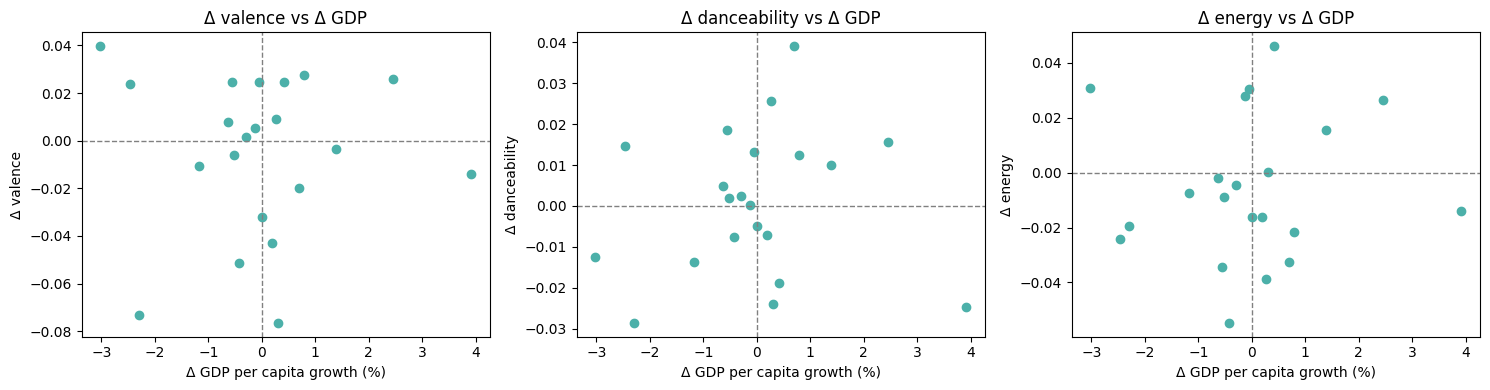

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

for ax, feature in zip(axes, features):
    ax.scatter(
        delta_df["delta_gdp"],
        delta_df[f"delta_{feature}"],
        color="#4CB0A9"
    )
    
    ax.axhline(0, linestyle="--", linewidth=1, color='gray')
    ax.axvline(0, linestyle="--", linewidth=1, color='gray')
    
    ax.set_xlabel("Δ GDP per capita growth (%)")
    ax.set_ylabel(f"Δ {feature}")
    ax.set_title(f"Δ {feature} vs Δ GDP")

plt.tight_layout()
plt.savefig("delta_scatter_music_vs_gdp.png", dpi=200)
plt.show()

In [37]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# for ax, feature in zip(axes, features):
#     ax.scatter(
#         delta_df["delta_gdp"],
#         delta_df[f"delta_{feature}"],
#         color="#4CB0A9"
#     )
    
#     ax.axhline(0, linestyle="--", linewidth=1, color='gray')
#     ax.axvline(0, linestyle="--", linewidth=1, color='gray')
    
#     ax.set_xlabel("Δ crecimiento del PIB per cápita (%)")
#     ax.set_ylabel(f"Δ {feature}")
#     ax.set_title(f"Δ {feature} vs Δ crecimiento del PIB")

# plt.tight_layout()
# plt.savefig("delta_scatter_music_vs_gdp.png", dpi=200)
# plt.show()

In [38]:
delta_results = []

for feature in music_vars:
    x = delta_df["delta_gdp"]
    y = delta_df[f"delta_{feature}"]
    
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)
    
    delta_results.append({
        "feature": feature,
        "pearson_r": pearson_r,
        "pearson_pvalue": pearson_p,
        "spearman_r": spearman_r,
        "spearman_pvalue": spearman_p
    })

delta_corr_df = pd.DataFrame(delta_results).set_index("feature")
delta_corr_df

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue
feature,,,,
danceability,0.098595,0.670698,0.148052,0.521874
energy,0.067090,0.772625,0.088312,0.703456
valence,-0.006082,0.979127,-0.036364,0.875650
tempo,-0.094033,0.685162,0.031169,0.893308
loudness,0.020667,0.929147,0.092208,0.690981
speechiness,-0.185471,0.420870,0.054545,0.814343
acousticness,-0.221081,0.335511,-0.251948,0.270563
instrumentalness,0.041461,0.858376,-0.058442,0.801328
liveness,-0.046074,0.842801,-0.007792,0.973258


The table reports Pearson and Spearman correlation coefficients computed between year-to-year variations in global GDP per capita growth and year-to-year changes in the aggregated musical features.

All correlation coefficients are small in magnitude, and the associated p-values are consistently high for every feature considered. This indicates that no statistically significant association is detected between annual economic fluctuations and short-term changes in musical characteristics.

Compared to the analysis based on absolute annual levels, the use of interannual variations explicitly focuses on short-term dynamics and removes long-term trends. However, even under this formulation, the results suggest that changes in the economic context are not systematically accompanied by synchronous changes in the analyzed musical features at a global scale.

As in previous analyses, these findings should be interpreted in light of the limited number of observations and the strong temporal aggregation, which may mask more subtle or delayed effects.